# Demonstration: Anomaly detection algorithm

In [1]:
from pennylane import numpy as np
from matplotlib import pyplot as plt

from PhaseEstimation import encoder as enc, vqe, visualization as qplt

In [2]:
N = 6
sidex = sidey = 100

In [3]:
lr = .3
epochs = 3000

In [4]:
myvqe = vqe.load_vqe('../data/vqes/ANNNI/N'+str(N)+'n100') # Load VQE
myenc  = enc.encoder(myvqe, enc.encoder_circuit)           # Construct Encoder

In [5]:
print(myenc)

0: ──||──||──RY(0.00)──────────╭C─────||──RZ(6.00)───────────╭C────────||──RZ(12.00)──────────╭C───
1: ──||──||──RY(1.00)──────────│──╭C──||──RZ(7.00)───────────│──╭C─────||──RZ(13.00)──────────│──╭C
2: ──||──||──RY(2.00)─╭C────╭Z─╰X─│───||──RZ(8.00)──╭C─╭Z────│──│──╭X──||──RZ(14.00)─╭C────╭Z─│──╰X
3: ──||──||──RY(3.00)─╰Z─╭C─│─────╰X──||──RZ(9.00)──│──╰C─╭Z─╰X─│──│───||──RZ(15.00)─╰Z─╭C─│──│──╭X
4: ──||──||──RY(4.00)────╰Z─╰C─╭X─────||──RZ(10.00)─╰Z────╰C────╰X─│───||──RZ(16.00)────╰Z─╰C─╰X─│─
5: ──||──||──RY(5.00)──────────╰C─────||──RZ(11.00)────────────────╰C──||──RZ(17.00)─────────────╰C

───||──RZ(18.00)─┤     
───||──RZ(19.00)─┤     
───||──RZ(20.00)─┤  <Z>
───||──RZ(21.00)─┤  <Z>
───||──RZ(22.00)─┤  <Z>
───||──RZ(23.00)─┤     


In [6]:
trainingpoints = [0,sidey-1, sidey*sidex - sidey]

Cost: 0.01003769040107727: 100%|██████████| 3000/3000 [00:12<00:00, 234.28it/s]  


1


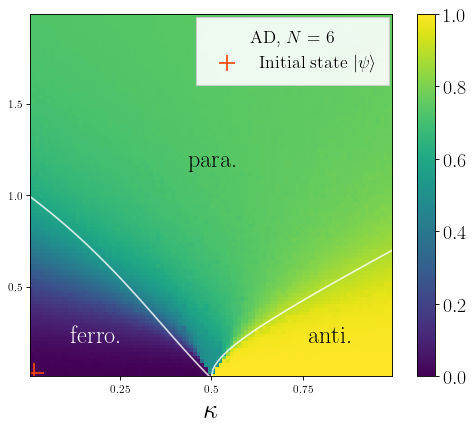

Cost: 0.12681180238723755: 100%|██████████| 3000/3000 [00:12<00:00, 231.32it/s]


1


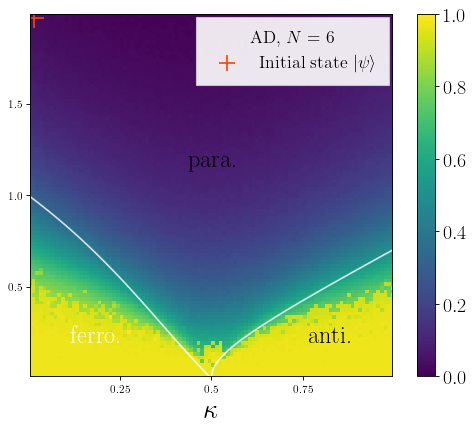

Cost: 0.0067480504512786865: 100%|██████████| 3000/3000 [00:11<00:00, 252.64it/s]


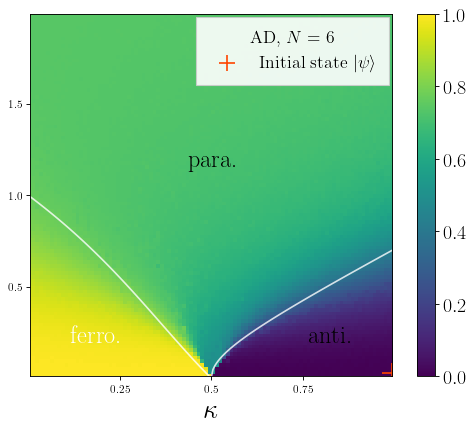

In [7]:
for trainingpoint in trainingpoints:
    myenc  = enc.encoder(myvqe, enc.encoder_circuit)
    myenc.train(lr, epochs, np.array([trainingpoint]), circuit = False)
    qplt.show_compression_ANNNI(myenc, trainingpoint = trainingpoint, plot3d = False)
    plt.show()